In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Datos/diabetes.csv")
# Muestra los nombres de las columnas
print(df.columns)
# Recodificar la columna de sexo
df['sex'] = df['sex'].apply(lambda x: 1 if x == 0.05068012 else 0)

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'age2', 'bmi2', 'map2', 'tc2', 'ldl2', 'hdl2', 'tch2', 'ltg2', 'glu2',
       'age_sex', 'age_bmi', 'age_map', 'age_tc', 'age_ldl', 'age_hdl',
       'age_tch', 'age_ltg', 'age_glu', 'sex_bmi', 'sex_map', 'sex_tc',
       'sex_ldl', 'sex_hdl', 'sex_tch', 'sex_ltg', 'sex_glu', 'bmi_map',
       'bmi_tc', 'bmi_ldl', 'bmi_hdl', 'bmi_tch', 'bmi_ltg', 'bmi_glu',
       'map_tc', 'map_ldl', 'map_hdl', 'map_tch', 'map_ltg', 'map_glu',
       'tc_ldl', 'tc_hdl', 'tc_tch', 'tc_ltg', 'tc_glu', 'ldl_hdl', 'ldl_tch',
       'ldl_ltg', 'ldl_glu', 'hdl_tch', 'hdl_ltg', 'hdl_glu', 'tch_ltg',
       'tch_glu', 'ltg_glu', 'y'],
      dtype='object')


# Task 1: Compute mean values and variance for all values

In [53]:
# Calcula la media de cada columna
mean_values = df.mean()

# Calcula la varianza de cada columna
variance_values = df.var()

# Muestra los resultados
print("Media de cada columna:")
print(mean_values)
print("\nVarianza de cada columna:")
print(variance_values)

Media de cada columna:
age       -1.357466e-10
sex        4.683258e-01
bmi        1.583710e-10
map       -2.262443e-10
tc         2.262444e-11
               ...     
hdl_glu    1.357466e-10
tch_ltg    4.524887e-11
tch_glu   -1.131222e-10
ltg_glu    2.262443e-10
y          1.521335e+02
Length: 65, dtype: float64

Varianza de cada columna:
age           0.002268
sex           0.249561
bmi           0.002268
map           0.002268
tc            0.002268
              ...     
hdl_glu       0.002268
tch_ltg       0.002268
tch_glu       0.002268
ltg_glu       0.002268
y          5943.331348
Length: 65, dtype: float64


# Task 2: Plot boxplots for BMI, BP and Y depending on gender

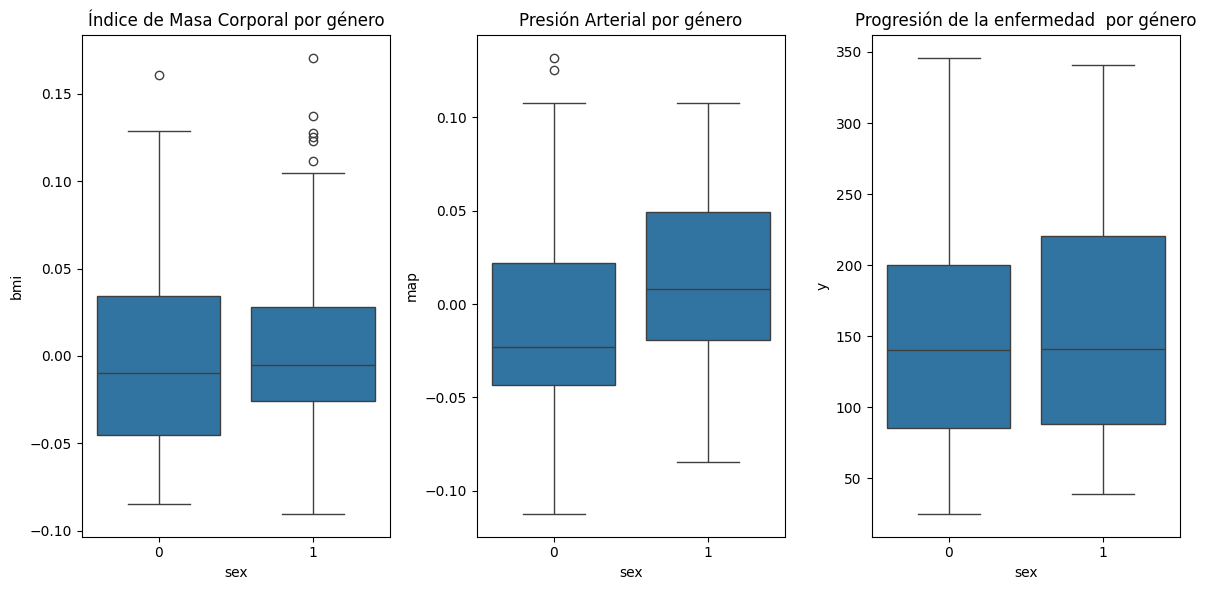

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea boxplots para BMI, BP y Y según el género
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Índice de Masa Corporal por género')

plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='map', data=df)
plt.title('Presión Arterial por género')

plt.subplot(1, 3, 3)
sns.boxplot(x='sex', y='y', data=df)
plt.title('Progresión de la enfermedad  por género')

plt.tight_layout()
plt.show()

# Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

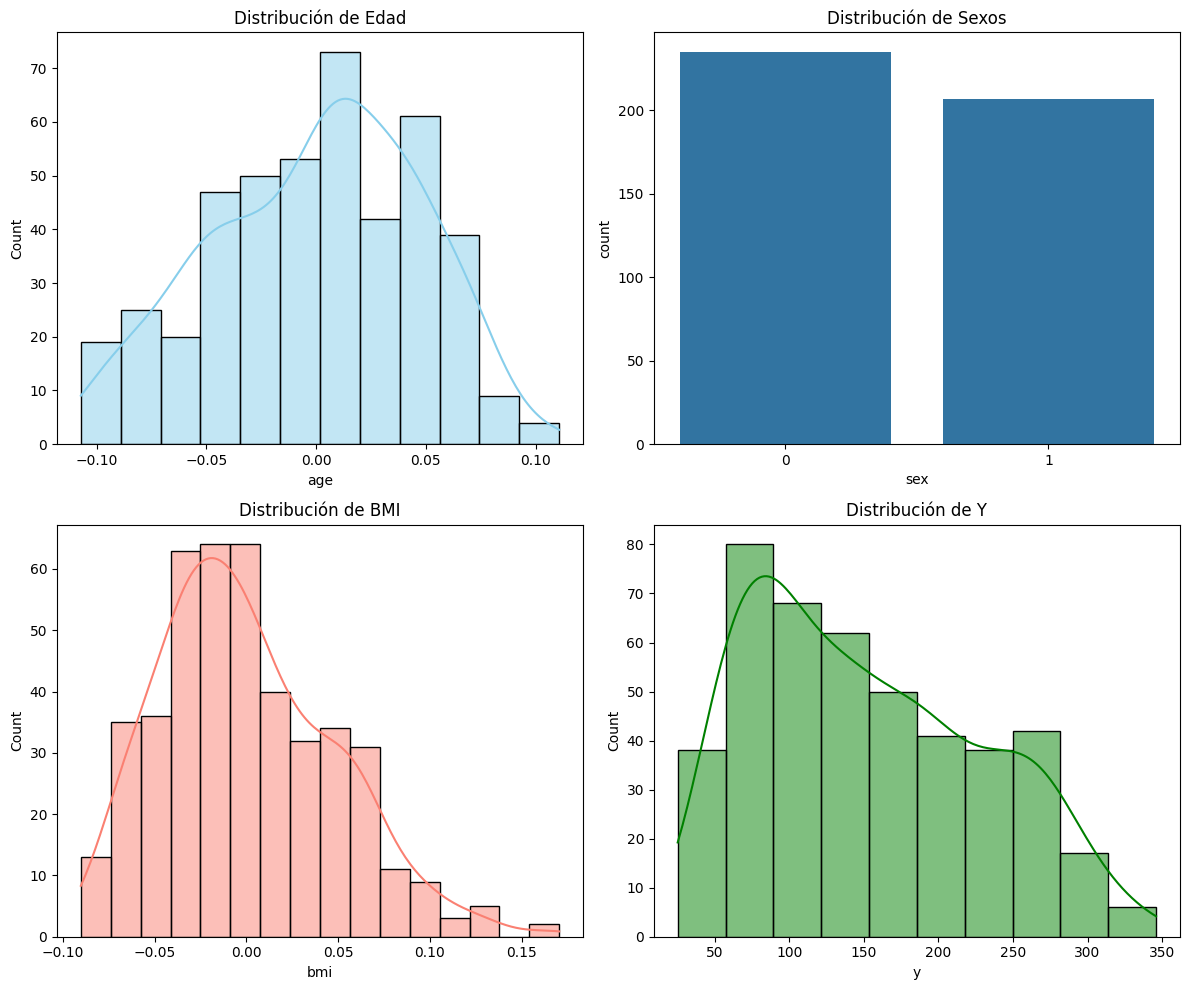

In [55]:
# Crear subplots para visualizar las distribuciones
plt.figure(figsize=(12, 10))

# Histograma para Age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribución de Edad')

# Countplot para Sex
plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=df)
plt.title('Distribución de Sexos')

# Histograma para BMI
plt.subplot(2, 2, 3)
sns.histplot(df['bmi'], kde=True, color='salmon')
plt.title('Distribución de BMI')

# Histograma para Y (variable dependiente)
plt.subplot(2, 2, 4)
sns.histplot(df['y'], kde=True, color='green')
plt.title('Distribución de Y')

plt.tight_layout()
plt.show()

# Task 4: Test the correlation between different variables and disease progression (Y)

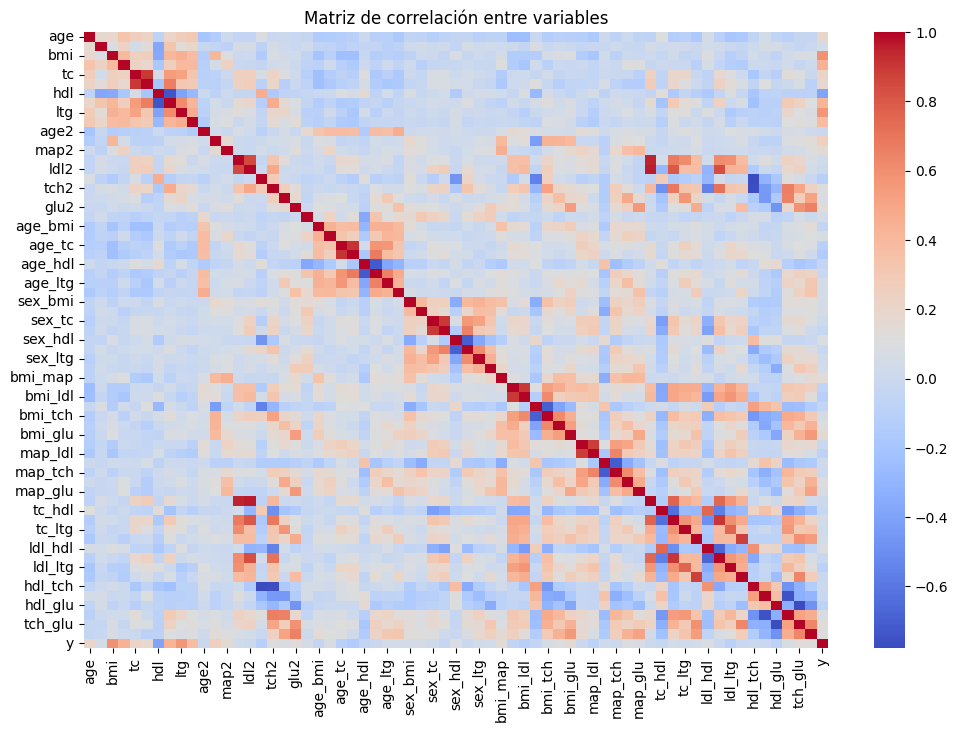

In [56]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación como un mapa de calor sin números
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()


# Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [106]:
# Obtener los valores de progresión de la enfermedad para mujeres y hombres
women_progression = df[df['sex'] == 0]['y']
men_progression = df[df['sex'] == 1]['y']

# Calcular la diferencia observada entre los grupos
observed_diff = np.mean(men_progression) - np.mean(women_progression)

# Combinar todos los datos
all_progression = np.concatenate((women_progression, men_progression))

# Realizar el análisis de permutación
num_permutations = 1000
diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(all_progression)
    permuted_women = all_progression[:len(women_progression)]
    permuted_men = all_progression[len(women_progression):]
    diffs[i] = np.mean(permuted_men) - np.mean(permuted_women)

# Calcular el valor p
p_value_permutation = np.sum(diffs >= observed_diff) / num_permutations

# Mostrar el resultado
alpha = 0.05
print(f"Valor de p mediante análisis de permutación: {p_value_permutation}")

if p_value_permutation < alpha:
    print("La diferencia en la progresión de la diabetes entre hombres y mujeres es estadísticamente significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en la progresión de la diabetes entre hombres y mujeres.")

Valor de p mediante análisis de permutación: 0.826
No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en la progresión de la diabetes entre hombres y mujeres.


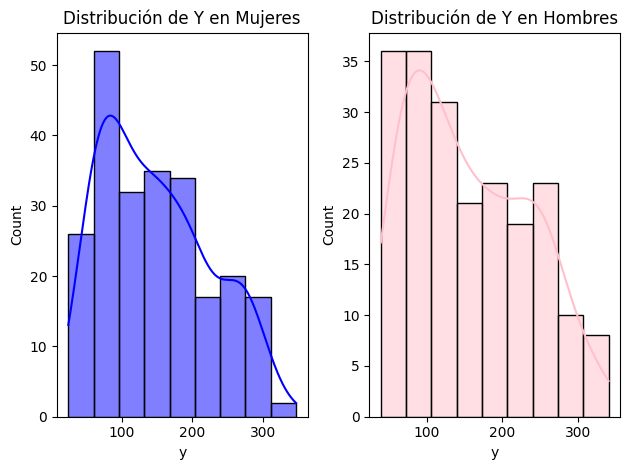

In [58]:
# Histograma para la progresión de la enfermedad ('Y') en hombres
plt.subplot(1, 2, 1)
sns.histplot(df[df['sex'] == 0]['y'], kde=True, color='blue')
plt.title('Distribución de Y en Mujeres')

# Histograma para la progresión de la enfermedad ('Y') en mujeres
plt.subplot(1, 2, 2)
sns.histplot(df[df['sex'] == 1]['y'], kde=True, color='pink')
plt.title('Distribución de Y en Hombres')

plt.tight_layout()
plt.show()